# Example 1: Entanglement
For this first example, we will create a Bell State -- an entangled state which as an equal superposition of |00> and |11>.

First, import the Qiskit stuff. Then create registers and a circuit.

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram


The Bell State is created using a Hadamard gate and a CNOT (controlled-X).  We insert these gates into the circuit, and then draw the circuit.

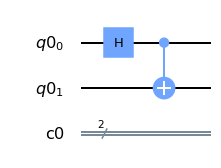

In [2]:
q = QuantumRegister(2)  # input
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)

qc.h(q[0])        # Hadamard on first qubit
qc.cx(q[0],q[1])  # CNOT to entangle

qc.draw(output='mpl')

We add some measurements, so that we can see how the circuit behaves.

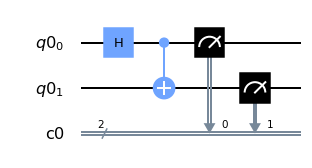

In [3]:
qc.measure(q,c)  # measures all qubits in the register

qc.draw(output='mpl')

The circuit is done, and we are ready to simulate it.  We use the **qasm_simulator** from the Aer provider.  We display the results in two ways: (1) as a list of counts, and (2) as a histogram.

{'00': 239, '11': 273}


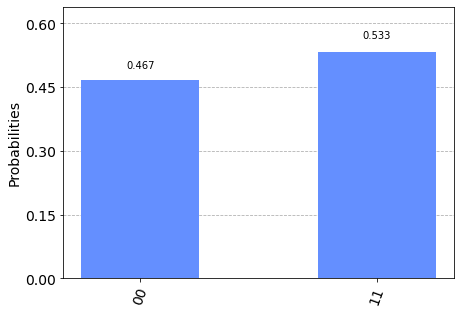

In [5]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=512)  # shots default = 1024
result = job.result()
print(result.get_counts())
plot_histogram(result.get_counts())